In [12]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

In [14]:
obesity= pd.read_csv('obesity.csv')

In [16]:
obesity.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
0,0,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0,0
1,0,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0,0
2,1,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0,0
3,1,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,1,0
4,1,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,1,0,0


In [18]:
# Split the data into predictor variables and an outcome variable
X = obesity.drop(["NObeyesdad"], axis=1)
y = obesity.NObeyesdad

In [20]:
# Create a logistic regression model
lr = LogisticRegression(max_iter=1000)

In [22]:
# Fit the logistic regression model
lr.fit(X, y)

LogisticRegression(max_iter=1000)

In [24]:
# Print the accuracy of the model
print(lr.score(X,y))

0.7659876835622927


In [26]:
# Create a sequential forward selection model
sfs = SFS(lr, 
          k_features=6, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=0)

In [28]:
# Fit the sequential forward selection model to X and y
sfs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          k_features=(6, 6), scoring='accuracy')

In [30]:
# Inspect the results of sequential forward selection
print(sfs.subsets_[6])

{'feature_idx': (1, 2, 3, 6, 9, 10), 'cv_scores': array([0.76930365]), 'avg_score': 0.7693036475603979, 'feature_names': ('Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'FAF')}


In [32]:
# See which features sequential forward selection chose
print(sfs.subsets_[6]['feature_names'])

# Print the model accuracy after doing sequential forward selection
print(sfs.subsets_[6]['avg_score'])

('Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'FAF')
0.7693036475603979


/Users/Surface1/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/Surface1/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


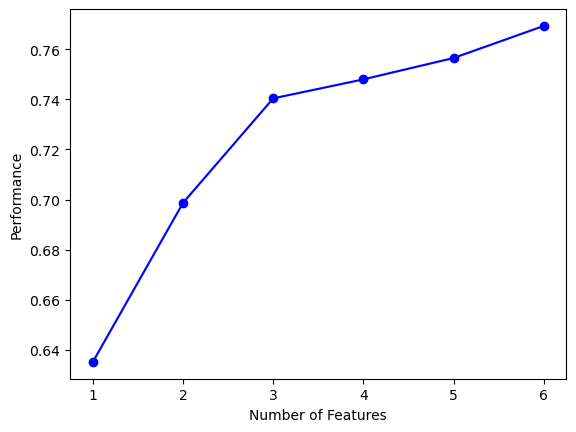

In [36]:
# Plot the model accuracy as a function of the number of features used
plot_sfs(sfs.get_metric_dict())
plt.show()

In [38]:
# Create a sequential backward selection model
sbs = SFS(lr, 
          k_features=7, 
          forward=False, 
          floating=False, 
          scoring='accuracy',
          cv=0)

In [40]:
# Fit the sequential backward selection model to X and y
sbs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          forward=False, k_features=(7, 7), scoring='accuracy')

In [42]:
# Inspect the results of sequential backward selection
print(sbs.subsets_[7])

{'feature_idx': (1, 2, 3, 6, 9, 10, 16), 'cv_scores': array([0.76740881]), 'avg_score': 0.7674088109900521, 'feature_names': ('Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'FAF', 'Public_Transportation')}


In [46]:
# See which features sequential backward selection chose
print(sbs.subsets_[7]['feature_names'])

# Print the model accuracy after doing sequential backward selection
print(sbs.subsets_[7]['avg_score'])

('Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'FAF', 'Public_Transportation')
0.7674088109900521


/Users/Surface1/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/Surface1/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


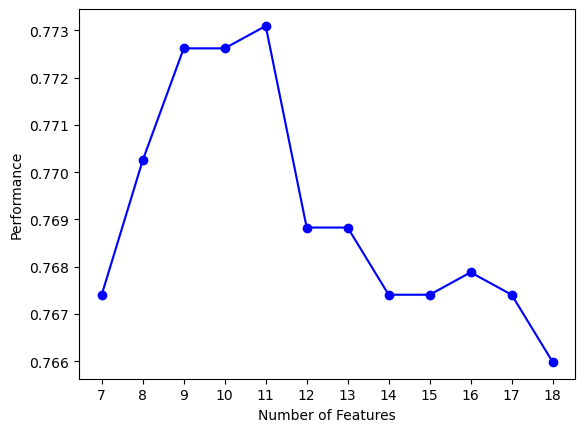

In [48]:
# Plot the model accuracy as a function of the number of features used
plot_sfs(sbs.get_metric_dict())
plt.show()

In [50]:
#Recursive Feature Elimination
# Get feature names
features = X.columns

In [58]:
# Standardize the data
X = pd.DataFrame(StandardScaler().fit_transform(X))

In [60]:
# Create a recursive feature elimination model
rfe = RFE(estimator=lr, n_features_to_select=6)

In [64]:
# Fit the recursive feature elimination model to X and y
rfe.fit(X, y)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=6)

In [68]:
#Inspect chosen features
# See which features recursive feature elimination chose
rfe_features = [f for (f, support) in zip(features, rfe.support_) if support]
print(rfe_features)

['Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'Automobile']


In [70]:
# Print the model accuracy after doing recursive feature elimination
print(rfe.score(X, y))

0.757934628138323


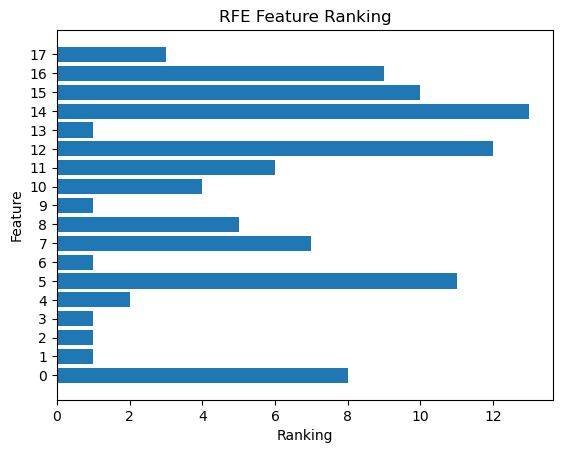

In [90]:
def plot_rfe(rfe, features):
    ranking = rfe. ranking_
    
    # Check if the length of features matches the length of rankings
    if len(features) != len(ranking):
        raise ValueError(f"Shape mismatch: 'features' has shape {len(features)}, but 'ranking' has shape {len(ranking)}.")

    plt.barh(range(len(features)), ranking, align='center')
    plt.yticks(range(len(features)), features)
    plt.xlabel('Ranking')
    plt.ylabel('Feature')
    plt.title('RFE Feature Ranking')
    plt.show()

# Assuming you have used RFE correctly as before
# Ensure that 'features' is the correct list of all feature names
plot_rfe(rfe, X.columns)  # Use X.columns to ensure correct length
